# SFFT 

In [20]:
import numpy as np

signal = np.array([1] * 10000)
frame_size = 1000
hop_size = 500


In [21]:
num_frequency_bins = frame_size / 2 + 1
num_frequency_bins

501.0

In [22]:
num_frames = (len(signal) - frame_size)/hop_size + 1
num_frames

19.0

In [23]:
import torch

ft =  torch.stft(torch.Tensor(signal), frame_size, hop_size, center=False, return_complex=True)
ft.shape

torch.Size([501, 19])

# Load Audio Files

In [25]:
from pathlib import Path

DATA_DIR = Path('data')

def download_asset_external(url: str, key: str) -> str:
    path = DATA_DIR / Path(key)
    if not path.exists():
        path.parent.mkdir(parents=True, exist_ok=True)
        torch.hub.download_url_to_file(url, path)
    return str(path)

In [31]:
import torchaudio

GITHUB_PATH = "https://github.com/musikalkemist/AudioSignalProcessingForML/raw/master/16%20-%20Extracting%20Spectrograms%20from%20Audio%20with%20Python/"

scale_file = download_asset_external(GITHUB_PATH + "audio/scale.wav", "audio/scale.wav")
debussy_file = download_asset_external(GITHUB_PATH + "audio/debussy.wav", "audio/debussy.wav")
duke_file = download_asset_external(GITHUB_PATH + "audio/duke.wav", "audio/duke.wav")
redhot_file = download_asset_external(GITHUB_PATH + "audio/redhot.wav", "audio/redhot.wav")

scale_waveform, sample_rate = torchaudio.load(scale_file)
debussy_waveform, sample_rate = torchaudio.load(debussy_file)
duke_waveform, sample_rate = torchaudio.load(duke_file)
redhot_waveform, sample_rate = torchaudio.load(redhot_file)

100%|██████████| 2.00M/2.00M [00:00<00:00, 23.0MB/s]


In [102]:
import IPython.display as ipd

ipd.Audio(scale_file)

In [33]:
scale_waveform.shape

torch.Size([2, 349885])

In [63]:
FRAME_SIZE=2048
HOP_SIZE=512

S_scale =  torch.stft(scale_waveform, n_fft=FRAME_SIZE, hop_length=HOP_SIZE, return_complex=True)
S_scale.shape

torch.Size([2, 1025, 684])

# Compute Spectrogram

In [64]:
Y_scale = torch.abs(S_scale) ** 2
Y_scale.shape

torch.Size([2, 1025, 684])

In [100]:
import librosa
from matplotlib import pyplot as plt

def plot_specgram(waveform, sample_rate, title="Spectrogram", y_axis='linear'):
    waveform = waveform.numpy()

    num_channels, num_frames, n_bins = waveform.shape
    plt.figure(figsize=(25, 10))
    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        librosa.display.specshow(waveform[c], sr=sample_rate, x_axis='time', y_axis=y_axis, ax=axes[c])
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)

<Figure size 2500x1000 with 0 Axes>

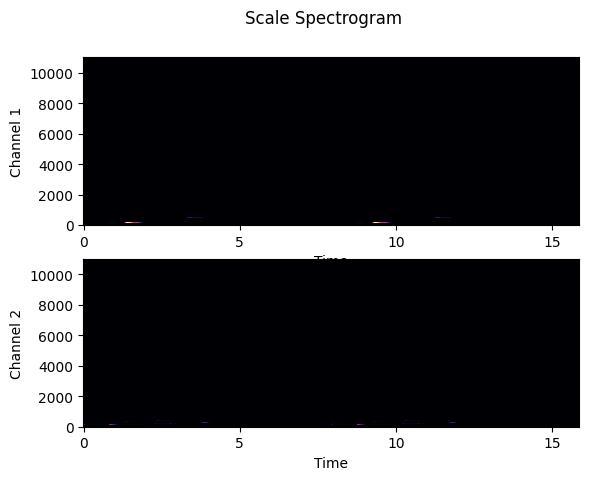

In [96]:
plot_specgram(Y_scale, sample_rate, title="Scale Spectrogram")

In [98]:
import torchaudio.functional as F

Y_log_scale = F.amplitude_to_DB(Y_scale, multiplier=10.0, amin=1e-10, db_multiplier=0.0, top_db=80.0)
Y_log_scale.shape

torch.Size([2, 1025, 684])

<Figure size 2500x1000 with 0 Axes>

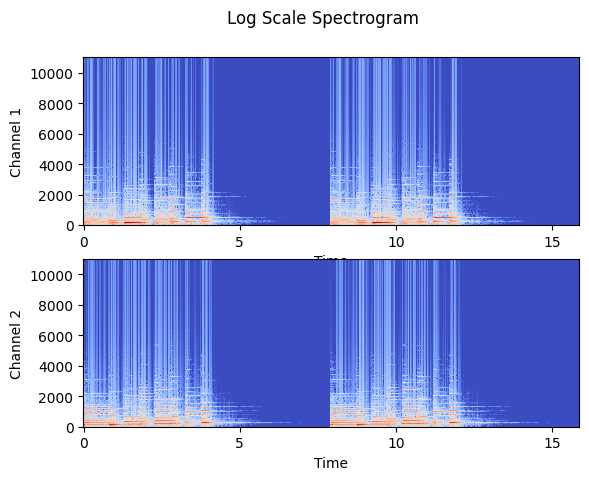

In [99]:
plot_specgram(Y_log_scale, sample_rate, title="Log Scale Spectrogram")


<Figure size 2500x1000 with 0 Axes>

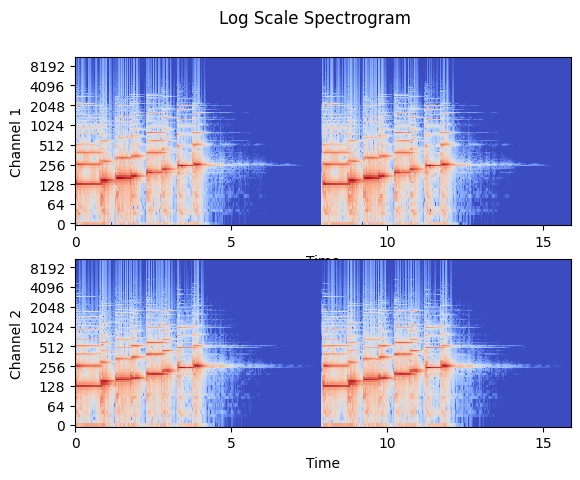

In [101]:
plot_specgram(Y_log_scale, sample_rate, title="Log Scale Spectrogram", y_axis="log")

# Visualize different Genres

<Figure size 2500x1000 with 0 Axes>

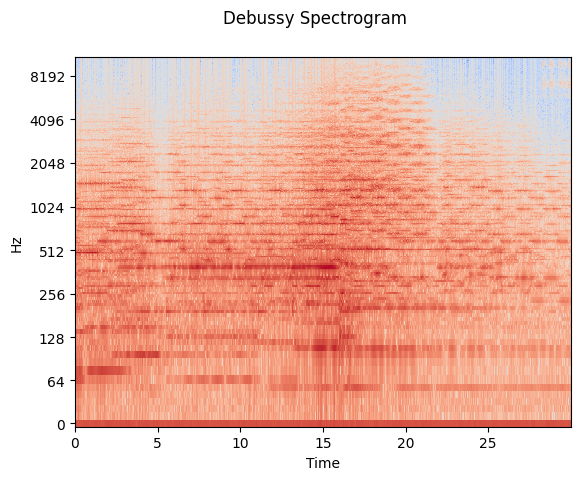

<Figure size 2500x1000 with 0 Axes>

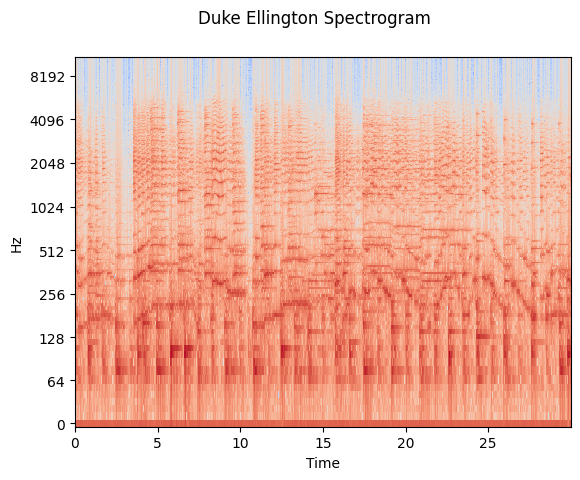

<Figure size 2500x1000 with 0 Axes>

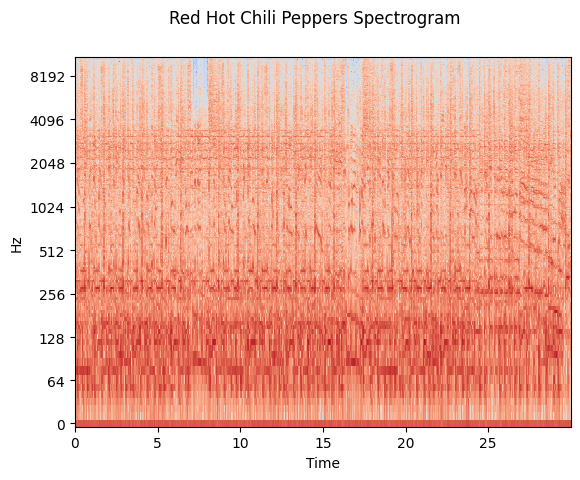

In [103]:
S_debussy = torch.stft(debussy_waveform, n_fft=FRAME_SIZE, hop_length=HOP_SIZE, return_complex=True)
S_duke = torch.stft(duke_waveform, n_fft=FRAME_SIZE, hop_length=HOP_SIZE, return_complex=True)
S_redhot = torch.stft(redhot_waveform, n_fft=FRAME_SIZE, hop_length=HOP_SIZE, return_complex=True)

Y_debussy = F.amplitude_to_DB(torch.abs(S_debussy) ** 2, multiplier=10.0, amin=1e-10, db_multiplier=0.0)
Y_duke = F.amplitude_to_DB(torch.abs(S_duke) ** 2, multiplier=10.0, amin=1e-10, db_multiplier=0.0)
Y_redhot = F.amplitude_to_DB(torch.abs(S_redhot) ** 2, multiplier=10.0, amin=1e-10, db_multiplier=0.0)

plot_specgram(Y_debussy, sample_rate, title="Debussy Spectrogram", y_axis="log")
plot_specgram(Y_duke, sample_rate, title="Duke Ellington Spectrogram", y_axis="log")
plot_specgram(Y_redhot, sample_rate, title="Red Hot Chili Peppers Spectrogram", y_axis="log")